In [15]:
import numpy as np
import glob
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_files = glob.glob(os.path.join(data_directory, '*.csv'))
print(csv_files)
data_file=pd.read_csv(csv_files[0])

value=data_file['velocity(m/s)']
print(value)


['./data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-01-19HR00_evid00002.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-03-25HR00_evid00003.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-03-26HR00_evid00004.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-04-25HR00_evid00006.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-04-26HR00_evid00007.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-06-15HR00_evid00008.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-06-26HR00_evid00009.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-07-20HR00_evid00010.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-07-20HR00_evid00011.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-09-26HR00_evid00013.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-10-24HR00_evid00014.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-11-12

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

import glob
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

data_directory = './data/lunar/training/data/S12_GradeA/'
csv_files = glob.glob(os.path.join(data_directory, '*.csv'))
print(csv_files)
data_file=pd.read_csv(csv_files[0])
value = data_file['velocity(m/s)']  # Replace with your actual time-series data

# Take the absolute value of the data
value = np.absolute(value)

# Find the peaks in the data
peaks, _ = find_peaks(value)


upper_bound_curve = interp1d(peaks, value[peaks], kind='cubic', fill_value="extrapolate")

smooth_upper_bound = upper_bound_curve(range(len(value)))
print(smooth_upper_bound)
# plt.figure(figsize=(10, 6))
# plt.plot(range(len(value)), value, label='ABS Original Time Series', color='blue')
plt.plot(range(len(value)), smooth_upper_bound, label='Upper Bounding Smooth Curve', color='red', linewidth=1)
print(min(smooth_upper_bound))
# plt.title('Upper Bounding Smooth Curve of Time-Varying Series')
# plt.xlabel('Time')
# plt.ylabel('Data Value')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
plt.show()


['./data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-01-19HR00_evid00002.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-03-25HR00_evid00003.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-03-26HR00_evid00004.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-04-25HR00_evid00006.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-04-26HR00_evid00007.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-06-15HR00_evid00008.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-06-26HR00_evid00009.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-07-20HR00_evid00010.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-07-20HR00_evid00011.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-09-26HR00_evid00013.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-10-24HR00_evid00014.csv', './data/lunar/training/data/S12_GradeA\\xa.s12.00.mhz.1970-11-12

ValueError: A value (0.0) in x_new is below the interpolation range's minimum value (2).

TypeError: only integer scalar arrays can be converted to a scalar index

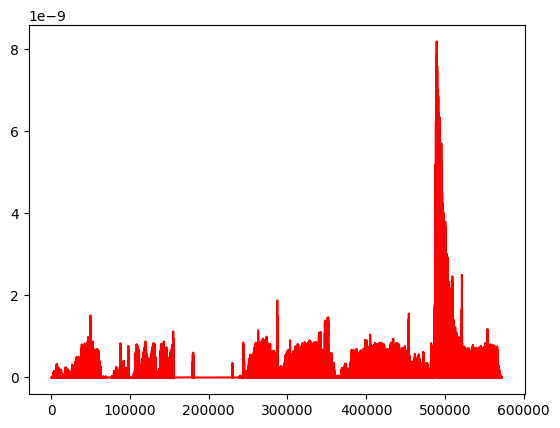

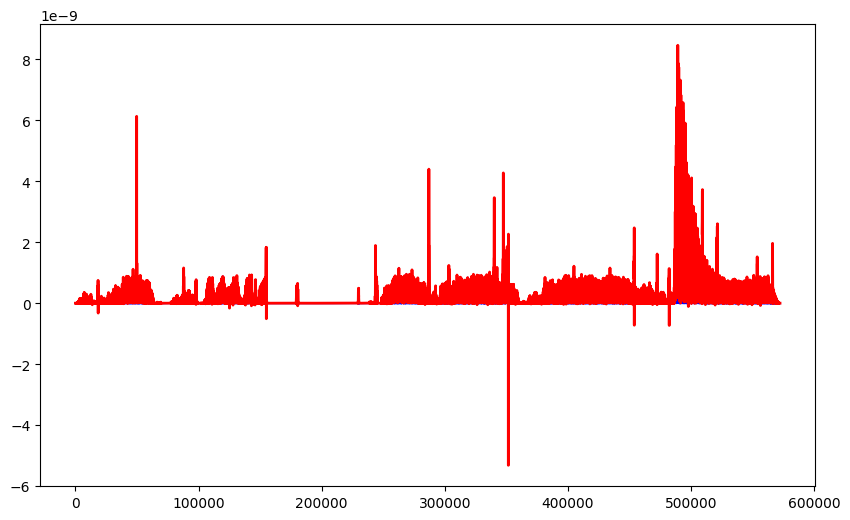

In [31]:
value=np.absolute(value)
plt.plot(range(len(value)),value,color='red')
from scipy.signal import find_peaks
peaks, _ = find_peaks(value)

from scipy.interpolate import interp1d
upper_bound_curve = interp1d(peaks, value[peaks], kind='cubic', fill_value="extrapolate")
smooth_upper_bound = upper_bound_curve(range(len(value)))
plt.figure(figsize=(10, 6))
plt.plot(range(len(value)), value, label='Original Time Series', color='blue')
plt.plot(range(len(value)), smooth_upper_bound, label='Upper Bounding Smooth Curve', color='red', linewidth=2)
plt.scatter(range(len(value))[peaks], value[peaks], color='green', marker='x', label='Peaks')  # Mark the peaks
plt.title('Upper Bounding Smooth Curve of Time Varying Series')
plt.xlabel('Time')
plt.ylabel('Data Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

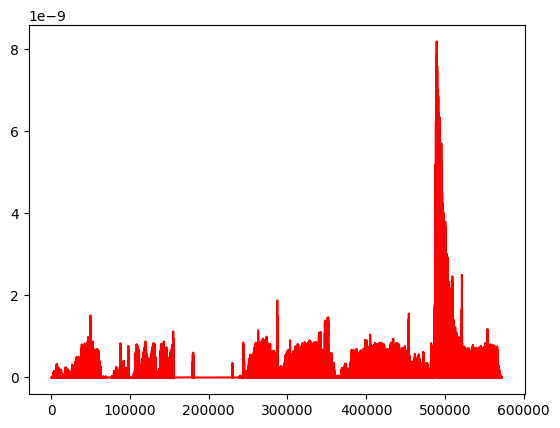

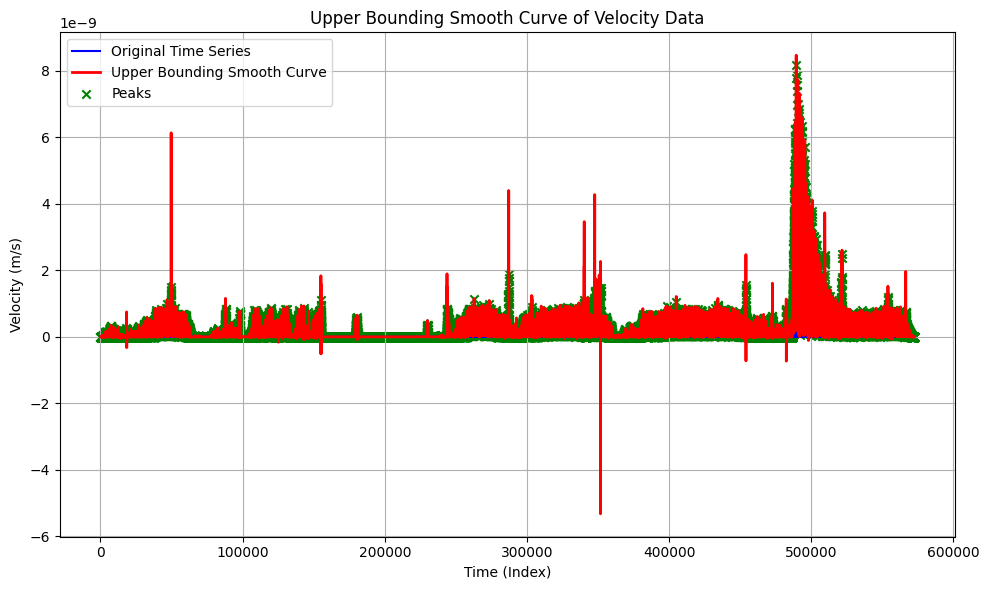

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

# Load the CSV file and extract the 'velocity(m/s)' column
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_files = glob.glob(os.path.join(data_directory, '*.csv'))
data=pd.read_csv(csv_files[0])

# Extract the velocity values
value = data['velocity(m/s)'].values
value = np.absolute(value)  # Ensure non-negative values

# Plot the original time series
plt.plot(range(len(value)), value, color='red')

# Find peaks in the data
peaks, _ = find_peaks(value)

# Interpolate the upper bound curve using cubic interpolation
upper_bound_curve = interp1d(peaks, value[peaks], kind='cubic', fill_value="extrapolate")

# Generate the smooth upper bound curve
smooth_upper_bound = upper_bound_curve(range(len(value)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(value)), value, label='Original Time Series', color='blue')
plt.plot(range(len(value)), smooth_upper_bound, label='Upper Bounding Smooth Curve', color='red', linewidth=2)
plt.scatter(peaks, value[peaks], color='green', marker='x', label='Peaks')  # Mark the peaks
plt.title('Upper Bounding Smooth Curve of Velocity Data')
plt.xlabel('Time (Index)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

    

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

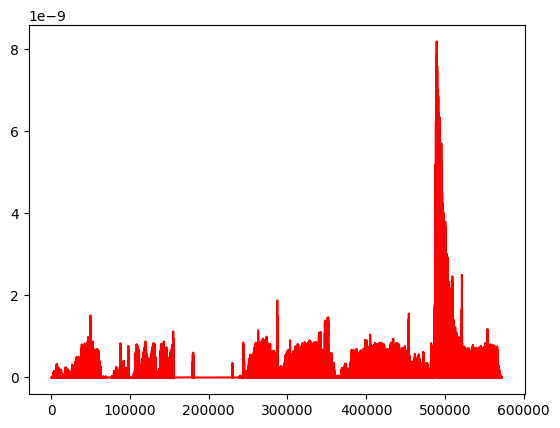

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

# Load the CSV file and extract the 'velocity(m/s)' column
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_files = glob.glob(os.path.join(data_directory, '*.csv'))
data=pd.read_csv(csv_files[0])

# Extract the velocity values
value = data['velocity(m/s)'].values
value = np.absolute(value)  # Ensure non-negative values

# Plot the original time series
plt.plot(range(len(value)), value, color='red')

# Find peaks in the data
peaks, _ = find_peaks(value,height=,distance=20)

# Interpolate the upper bound curve using cubic interpolation
upper_bound_curve = interp1d(peaks, value[peaks], kind='cubic', fill_value="extrapolate")

# Generate the smooth upper bound curve
smooth_upper_bound = upper_bound_curve(range(len(value)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(value)), value, label='Original Time Series', color='blue')
plt.plot(range(len(value)), smooth_upper_bound, label='Upper Bounding Smooth Curve', color='red', linewidth=2)
plt.scatter(peaks, value[peaks], color='green', marker='x', label='Peaks')  # Mark the peaks
plt.title('Upper Bounding Smooth Curve of Velocity Data')
plt.xlabel('Time (Index)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import glob
import os

# Load the CSV file and extract the 'velocity(m/s)' column
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_files = glob.glob(os.path.join(data_directory, '*.csv'))
data = pd.read_csv(csv_files[0])

# Extract the velocity values
value = data['velocity(m/s)'].values
value = np.absolute(value)  # Ensure non-negative values

# Identify the peaks in the time series
peaks, _ = find_peaks(value, height=0)




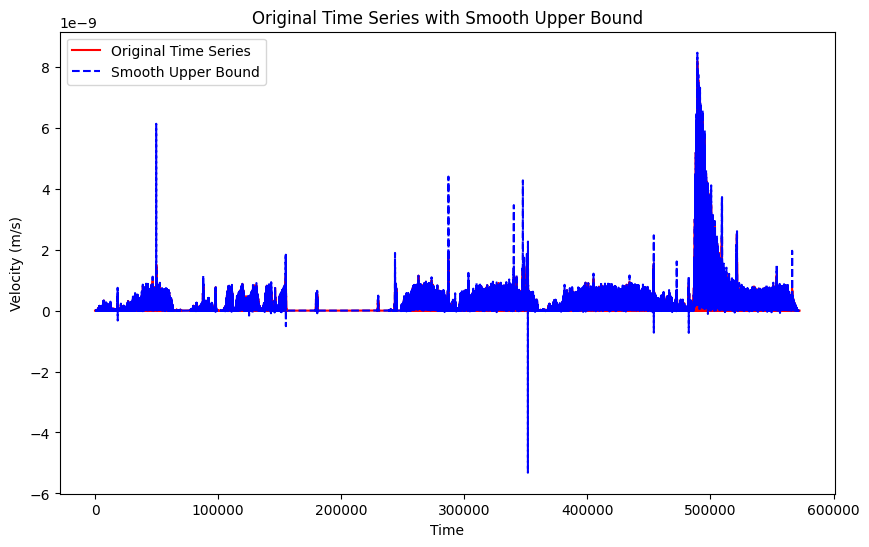

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import glob
import os

# Load the CSV file and extract the 'velocity(m/s)' column
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_files = glob.glob(os.path.join(data_directory, '*.csv'))
data = pd.read_csv(csv_files[0])

# Extract the velocity values
value = data['velocity(m/s)'].values
value = np.absolute(value)  # Ensure non-negative values

# Identify the peaks in the time series
peaks, _ = find_peaks(value, height=0)  # You can adjust the 'height' or other params if needed

# Interpolate a smooth upper bound through the peaks
# Create an interpolating function with cubic smoothing through the peaks
peak_times = peaks
peak_values = value[peaks]
interp_func = interp1d(peak_times, peak_values, kind='cubic', fill_value='extrapolate')

# Generate a smooth upper bound
x_new = np.arange(0, len(value))  # Full time series range
smooth_upper_bound = interp_func(x_new)

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(range(len(value)), value, color='red', label='Original Time Series')

# Plot the smooth upper bound
plt.plot(x_new, smooth_upper_bound, color='blue', linestyle='--', label='Smooth Upper Bound')

plt.legend()
plt.title('Original Time Series with Smooth Upper Bound')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.show()


Peaks at indices: [ 89559 119658 298784 301678 307980 314088 507985 563730]
Peak values: [0.26035177 0.19292461 0.1314547  0.17245215 0.11317598 0.14474908
 0.21811798 0.10464464]


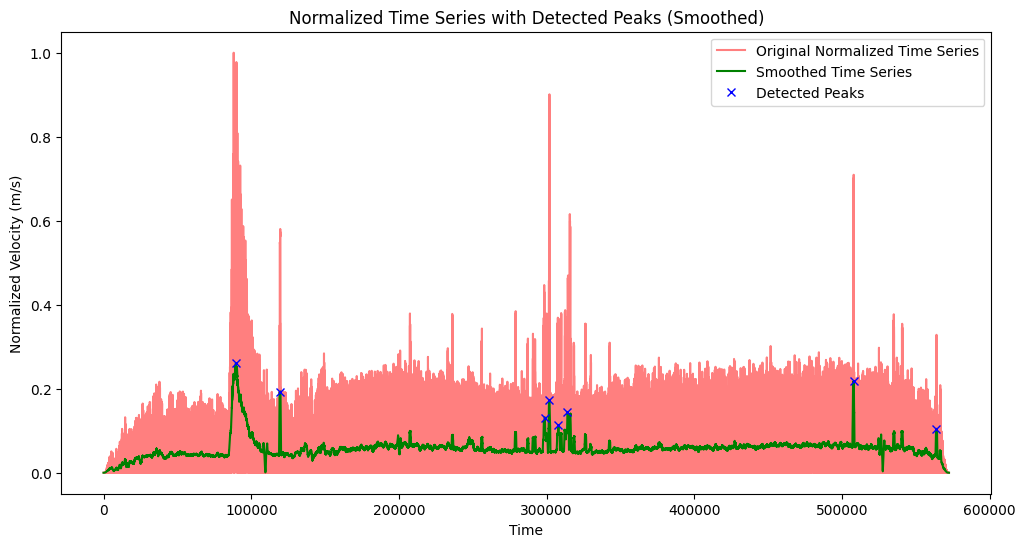

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import glob
import os

# Function to apply a sliding window (moving average) to smooth the data
def smooth_data(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

# Function to normalize the data between 0 and 1
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Load the CSV file and extract the 'velocity(m/s)' column
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_files = glob.glob(os.path.join(data_directory, '*.csv'))
data = pd.read_csv(csv_files[1])

# Extract the velocity values
value = data['velocity(m/s)'].values
value = np.absolute(value)  # Ensure non-negative values

# Normalize the original data
normalized_value = normalize_data(value)

# Smooth the normalized data using a moving average with a specified window size
window_size = 1000  # Adjust window size for smoothing
smoothed_value = smooth_data(normalized_value, window_size)

# Identify the peaks in the smoothed, normalized time series
# Adjust parameters like 'distance', 'prominence', and 'height' to filter out noise
peaks, properties = find_peaks(smoothed_value, distance=2000, prominence=0.05, height=0.1)

# Print the detected peaks and their properties
print("Peaks at indices:", peaks)
print("Peak values:", smoothed_value[peaks])

# Plot the original time series and the smoothed version
plt.figure(figsize=(12, 6))
plt.plot(range(len(normalized_value)), normalized_value, color='red', alpha=0.5, label='Original Normalized Time Series')
plt.plot(range(len(smoothed_value)), smoothed_value, color='green', label='Smoothed Time Series')

# Mark the peaks on the smoothed plot
plt.plot(peaks, smoothed_value[peaks], "x", color='blue', label='Detected Peaks')

# Add labels and title
plt.legend()
plt.title('Normalized Time Series with Detected Peaks (Smoothed)')
plt.xlabel('Time')
plt.ylabel('Normalized Velocity (m/s)')
plt.show()


Peaks at indices: [   974   2021   3147   4205   5377   6535   7608   8667   9992  11022
  12556  13601  14622  16259  17610  18826  19989  21397  22431  23975
  25172  26216  27425  28636  29925  31297  32510  33550  34577  35640
  36782  38218  39655  41121  42208  43265  44301  45302  46764  48738
  50442  51622  52723  53735  55532  56582  57765  58901  60213  61627
  62958  64162  65954  67169  68674  69835  71541  73483  74946  76042
  77189  79145  80319  81460  82464  84244  85851  86892  88105  89217
  90289  91519  92524  93546  94574  95989  97072  98089  99276 100350
 102170 103400 104457 105593 107461 108580 110481 111842 113060 114745
 116458 117831 119552 121377 123204 124842 126005 127234 128769 130265
 131289 132386 133924 135081 136140 137665 139362 140681 142444 143893
 144994 146027 147841 149520 151392 152588 153628 154710 155824 157523
 158726 160426 161775 163498 164881 165896 166987 168448 170153 171420
 172717 174669 175732 176864 177992 178999 180012 181181 18

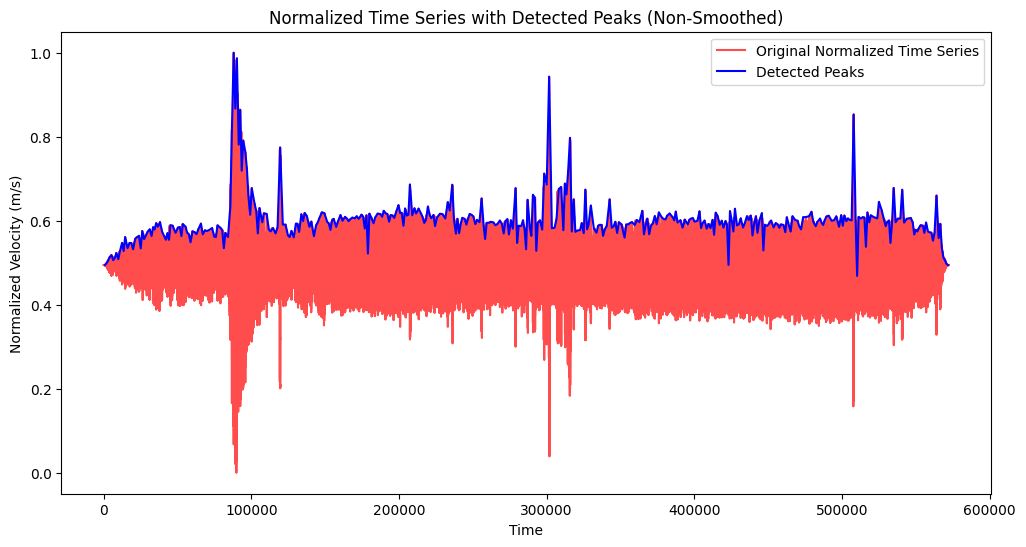

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import glob
import os

# Function to normalize the data between 0 and 1
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Load the CSV file and extract the 'velocity(m/s)' column
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_files = glob.glob(os.path.join(data_directory, '*.csv'))
data = pd.read_csv(csv_files[1])

# Extract the velocity values
value = data['velocity(m/s)'].values
value = np.absolute(value)  # Ensure non-negative values

# Normalize the original data
normalized_value = normalize_data(value)

# Identify the peaks in the non-smoothed, normalized time series
# Increase sensitivity to detect more peaks by reducing 'prominence', 'height', and 'distance'
peaks, properties = find_peaks(normalized_value, distance=1000, prominence=0.0000000000001, height=0.05)

# Print the detected peaks and their properties
print("Peaks at indices:", peaks)
print("Peak values:", normalized_value[peaks])

# Plot the original normalized time series
plt.figure(figsize=(12, 6))
plt.plot(range(len(normalized_value)), normalized_value, color='red', alpha=0.7, label='Original Normalized Time Series')

# Mark the peaks on the plot
plt.plot(peaks, normalized_value[peaks], color='blue', label='Detected Peaks')

# Add labels and title
plt.legend()
plt.title('Normalized Time Series with Detected Peaks (Non-Smoothed)')
plt.xlabel('Time')
plt.ylabel('Normalized Velocity (m/s)')
plt.show()

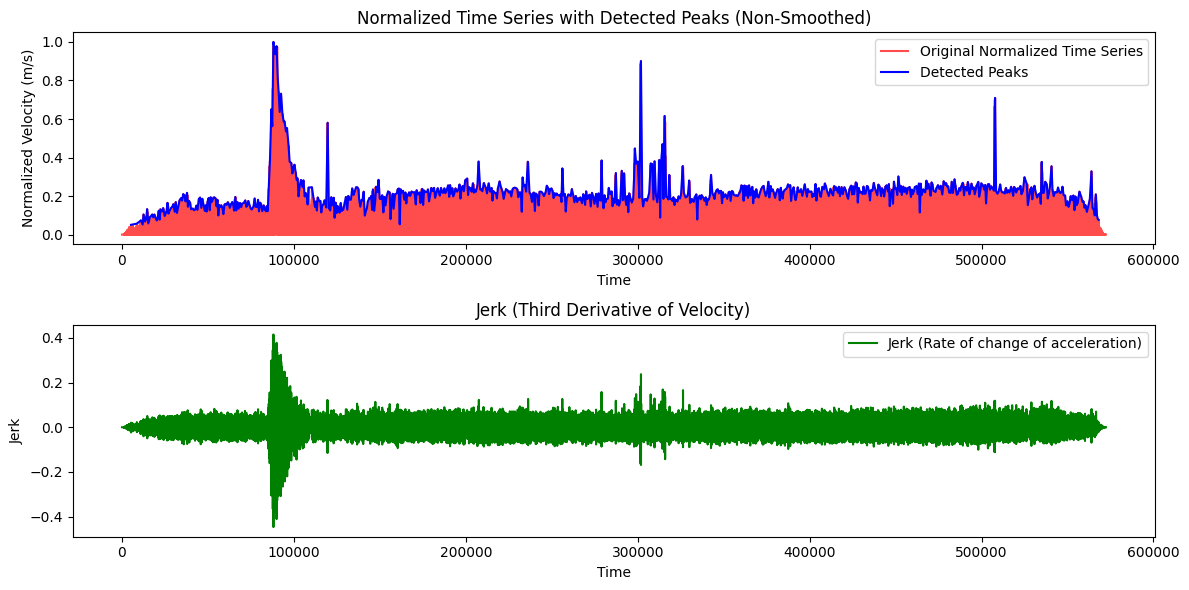

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import glob
import os

# Function to normalize the data between 0 and 1
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Load the CSV file and extract the 'velocity(m/s)' column
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_files = glob.glob(os.path.join(data_directory, '*.csv'))
data = pd.read_csv(csv_files[1])

# Extract the velocity values
value = data['velocity(m/s)'].values
value = np.absolute(value)  # Ensure non-negative values

# Normalize the original data
normalized_value = normalize_data(value)

# Compute acceleration (first derivative of velocity)
acceleration = np.gradient(normalized_value)

# Compute jerk (second derivative of velocity / first derivative of acceleration)
jerk = np.gradient(acceleration)

# Identify the peaks in the non-smoothed, normalized time series
peaks, properties = find_peaks(normalized_value, distance=500, prominence=0.000000001, height=0.05)

# Plot the original normalized time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(range(len(normalized_value)), normalized_value, color='red', alpha=0.7, label='Original Normalized Time Series')
plt.plot(peaks, normalized_value[peaks], color='blue', label='Detected Peaks')
plt.legend()
plt.title('Normalized Time Series with Detected Peaks (Non-Smoothed)')
plt.xlabel('Time')
plt.ylabel('Normalized Velocity (m/s)')

# Plot the jerk values
plt.subplot(2, 1, 2)
plt.plot(range(len(jerk)), jerk, color='green', label='Jerk (Rate of change of acceleration)')
plt.title('Jerk (Third Derivative of Velocity)')
plt.xlabel('Time')
plt.ylabel('Jerk')
plt.legend()

plt.tight_layout()
plt.show()


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import glob
import os
catalog_file=pd.read_csv('./data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv')
print(catalog_file.columns)
data_directory = './processed_data/processed_data'
csv_files = glob.glob(os.path.join(data_directory, '*.csv'))



Index(['filename', 'time_abs(%Y-%m-%dT%H:%M:%S.%f)', 'time_rel(sec)', 'evid',
       'mq_type'],
      dtype='object')
Index(['time', 'velocity'], dtype='object')
0        -1.375124e-17
1        -9.937543e-17
2        -3.351620e-16
3        -7.008230e-16
4        -9.947061e-16
              ...     
572406   -5.506711e-16
572407   -7.322501e-16
572408   -6.201751e-16
572409   -1.117810e-17
572410    1.066123e-15
Name: velocity, Length: 572411, dtype: float64


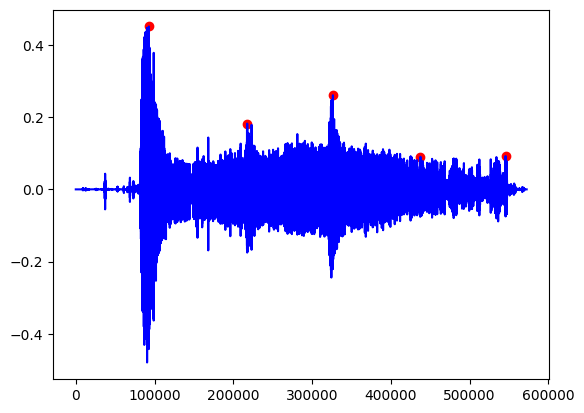

Number of peaks: [4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 5, 2, 5, 4, 4, 4, 4, 4, 1, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 5, 4, 3, 5, 5, 4, 4, 5, 5, 5, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5]


In [158]:
# for i in values:
#     print(i)
n_peak=list()
for i in range (len(csv_files)):
    file=pd.read_csv(csv_files[i])
    values=file['velocity']
    peaks,_=find_peaks(values,distance=100000, prominence=0.000000001,height=values.mean())
    # plt.scatter(peaks,values[peaks],color='yellow')
    # plt.plot(range(len(values)),values,color='blue')
    # plt.show()
    n_peak.append(len(peaks))
file=pd.read_csv(csv_files[75])
values=file['velocity']
peaks,_=find_peaks(values,distance=100000, prominence=0.000000001,height=values.mean())
plt.scatter(peaks,values[peaks],color='red')
plt.plot(range(len(values)),values,color='blue')
plt.show()
n_peak.append(len(peaks))

print("Number of peaks:", n_peak)